In [1]:
#import required libraries
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
warnings.filterwarnings('ignore')
Data= pd.read_csv(r'D:\COMPLETE PROJECT\CHURN ANALYSIS\raw data.csv')
Data.drop('Unnamed: 0',inplace=True,axis=1)
Data.head(2)

,UserId,CreatedtTime,LastDayAPPLaunched,DeviceType,LastLoginTime,NumberDeviceId,TotalGamePlayed,CardGamePlayed,FantasyPlayed,CasualPaid,...,CashBackGiven,WalletBalance,PlatformFee,JoiningBonus,UserTrustScore,TotalBet,currentLoginMedium,firstLogicChannel,VIP,TotalGamePlayed_2
0,127233585,2021-12-01,2021-12-01,1,2021-12-01,1,0,0,0,0,...,0,0.0,0,0,0,0.0,1.0,1.0,0,0
1,127233586,2021-12-01,2021-12-01,1,2021-12-01,3,1,1,0,1,...,0,0.0,1,1,60,0.0,1.0,1.0,0,8


In [2]:
Data['CreatedtTime']= pd.to_datetime(Data['CreatedtTime'])
Data['LastDayAPPLaunched']= pd.to_datetime(Data['LastDayAPPLaunched'])
Data['LastLoginTime']= pd.to_datetime(Data['CreatedtTime'])
Data['ChurnDuration'] = (Data['LastDayAPPLaunched']-Data['CreatedtTime']).dt.days
Data1 = Data[Data['ChurnDuration'] == 3]
Data1

,UserId,CreatedtTime,LastDayAPPLaunched,DeviceType,LastLoginTime,NumberDeviceId,TotalGamePlayed,CardGamePlayed,FantasyPlayed,CasualPaid,...,WalletBalance,PlatformFee,JoiningBonus,UserTrustScore,TotalBet,currentLoginMedium,firstLogicChannel,VIP,TotalGamePlayed_2,ChurnDuration
30,127233615,2021-12-01,2021-12-04,1,2021-12-01,1,1,0,0,0,...,52.00,0,1,55,0.0,1.0,1.0,0,2,3.0
31,127233616,2021-12-01,2021-12-04,1,2021-12-01,1,0,0,0,0,...,0.00,0,0,40,0.0,2.0,2.0,0,0,3.0
56,127233641,2021-12-01,2021-12-04,1,2021-12-01,2,0,0,0,0,...,0.00,0,0,60,0.0,2.0,2.0,0,0,3.0
124,127233711,2021-12-01,2021-12-04,1,2021-12-01,1,0,0,0,0,...,0.00,0,0,80,0.0,1.0,1.0,0,0,3.0
125,127233712,2021-12-01,2021-12-04,1,2021-12-01,2,1,0,0,1,...,5.00,1,0,50,0.0,1.0,1.0,0,10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130576,127366399,2021-12-15,2021-12-18,1,2021-12-15,2,1,0,0,1,...,0.00,1,0,60,0.0,1.0,1.0,0,11,3.0
130673,127366496,2021-12-15,2021-12-18,1,2021-12-15,1,1,1,0,1,...,0.80,1,1,65,0.0,1.0,1.0,0,5,3.0
130745,127366568,2021-12-15,2021-12-18,1,2021-12-15,4,1,1,0,0,...,3.70,1,0,90,0.0,2.0,2.0,0,25,3.0
130774,127366597,2021-12-15,2021-12-18,1,2021-12-15,1,1,1,0,0,...,0.00,1,1,60,0.0,1.0,1.0,0,55,3.0


Total number 130803 of Total Member reg in mentioned 15 Days.
Total number 3782 of Total Member of 3rd Churn day in mentioned 15 Days.


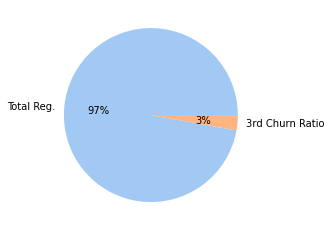

In [3]:
print("Total number "+str(Data.shape[0])+" of Total Member reg in mentioned 15 Days.")
print("Total number "+str(Data1.shape[0])+" of Total Member of 3rd Churn day in mentioned 15 Days.")
data=[Data.shape[0],Data1.shape[0]]
labels=['Total Reg.','3rd Churn Ratio']
colors = sns.color_palette('pastel')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

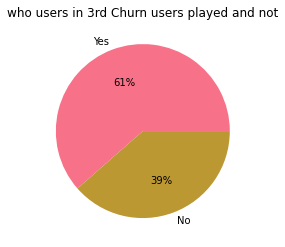

 Calculus : 2325 number of users played more then and equal 1 game,
		1457 number of users not played any game


In [4]:
JoiningBonus = Data1[Data1['TotalGamePlayed_2'] >= 1]
NotJoiningBonus = Data1[Data1['TotalGamePlayed_2'] == 0]
data=[JoiningBonus.shape[0],NotJoiningBonus.shape[0]]
labels=['Yes','No']
plt.title("who users in 3rd Churn users played and not")
colors = sns.color_palette("husl")[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
print(" Calculus : "+str(JoiningBonus.shape[0])+" number of users played more then and equal 1 game,\n\t\t"+str(NotJoiningBonus.shape[0])+" number of users not played any game")

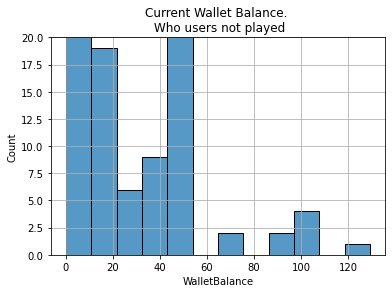

In [5]:
AddMoney = Data1[Data1['TotalGamePlayed_2'] == 0]
#WalletBalance = AddMoney['WalletBalance']
gfg=sns.histplot(AddMoney['WalletBalance'])
gfg.set_ylim(0, 20)
plt.title("Current Wallet Balance. \n Who users not played")
plt.grid()
plt.show()

Total 2325 number of Users played More then and equal 1 game.
 CardGamePlayed : 1526,
 FantasyPlayed : 68,
 CasualPaid : 989,
 CasualFree : 1617,
 PlayedTournament 65 


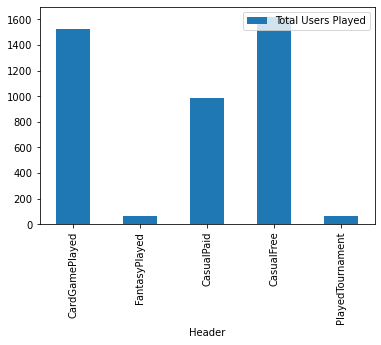

In [6]:
AddMoney = Data1[Data1['TotalGamePlayed_2'] >= 1]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users played More then and equal 1 game.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Users Played':value_played  }).plot.bar(x='Header', y='Total Users Played')
plt.xticks(rotation=90)
plt.show()

In [7]:
AddMoney = Data1[(Data1['TotalGamePlayed_2'] == 0) & (Data1['WalletBalance'] <=3.0)]
print(" "+str(len(AddMoney))+" Users, who have less than 3 Rs. in wallet.")
AddMoney = Data1[(Data1['TotalGamePlayed_2'] == 0) & (Data1['WalletBalance'] <=5.0)]
print(" "+str(len(AddMoney))+" Users, who have less than 5 Rs. in wallet.")
AddMoney = Data1[(Data1['TotalGamePlayed_2'] == 0) & (Data1['WalletBalance'] <=10.0)]
print(" "+str(len(AddMoney))+" Users, who have less than 10 Rs. in wallet.")

 1289 Users, who have less than 3 Rs. in wallet.
 1324 Users, who have less than 5 Rs. in wallet.
 1341 Users, who have less than 10 Rs. in wallet.


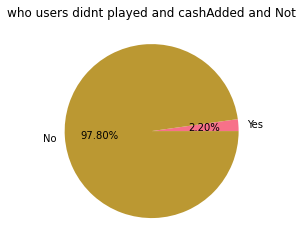

 Calculus : 32 number of users dindt played and cash added,
	1425 number of users not played and not added money


In [8]:
JoiningBonus = Data1[(Data1['TotalGamePlayed_2'] == 0) & (Data1['cashAdded'] == 1)]
NotJoiningBonus = Data1[(Data1['TotalGamePlayed_2'] == 0) & (Data1['cashAdded'] == 0)]
data=[JoiningBonus.shape[0],NotJoiningBonus.shape[0]]
labels=['Yes','No']
plt.title("who users didnt played and cashAdded and Not")
colors = sns.color_palette("husl")[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()
print(" Calculus : "+str(JoiningBonus.shape[0])+" number of users dindt played and cash added,\n\t"+str(NotJoiningBonus.shape[0])+" number of users not played and not added money")

Who users not redeemed and added money and not played CardGame , 3416
Total 2029 number of Users not redeemed Money and also didnt add money.
 FantasyPlayed : 28,
 CasualPaid : 545,
 CasualFree : 612,
 PlayedTournament 10 


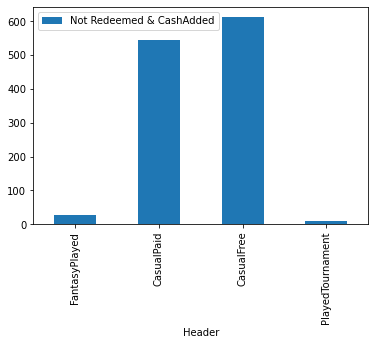

In [9]:
AddMoney = Data1[(Data1['Redeemed'] == 0) & (Data1['cashAdded'] == 0)]
print("Who users not redeemed and added money and not played CardGame , "+str(len(AddMoney))+"")
AddMoney = Data1[(Data1['Redeemed'] == 0) & (Data1['cashAdded'] == 0) & (Data1['CardGamePlayed'] == 0) ]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users not redeemed Money and also didnt add money.\n FantasyPlayed : "+str(final[0][0])+",\n CasualPaid : "+str(final[0][1])+",\n CasualFree : "+str(final[0][2])+",\n PlayedTournament "+str(final[0][3])+" ")
pd.DataFrame({'Header':Header, 'Not Redeemed & CashAdded':value_played  }).plot.bar(x='Header', y='Not Redeemed & CashAdded')
plt.xticks(rotation=90)
plt.show()

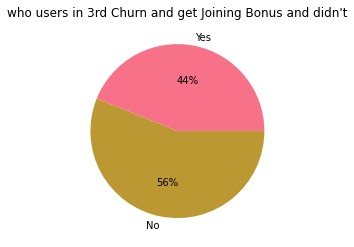

 Calculus : 1661 number of users get joining Bonus,
		2121 number of users didnt get


In [10]:
JoiningBonus = Data1[Data1['JoiningBonus'] == 1]
NotJoiningBonus = Data1[Data1['JoiningBonus'] == 0]
data=[JoiningBonus.shape[0],NotJoiningBonus.shape[0]]
labels=['Yes','No']
plt.title("who users in 3rd Churn and get Joining Bonus and didn't")
colors = sns.color_palette("husl")[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
print(" Calculus : "+str(JoiningBonus.shape[0])+" number of users get joining Bonus,\n\t\t"+str(NotJoiningBonus.shape[0])+" number of users didnt get")

Total 1661 number of Users got joining bonus.
 CardGamePlayed : 1097,
 FantasyPlayed : 52,
 CasualPaid : 831,
 CasualFree : 797,
 PlayedTournament 71 


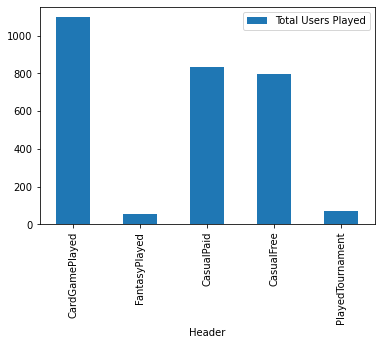

In [11]:
AddMoney = Data1[Data1['JoiningBonus'] == 1]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users got joining bonus.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Users Played':value_played  }).plot.bar(x='Header', y='Total Users Played')
plt.xticks(rotation=90)
plt.show()

Total 2121 number of Users didnt get joining bonus.
 CardGamePlayed : 602,
 FantasyPlayed : 16,
 CasualPaid : 221,
 CasualFree : 820,
 PlayedTournament 5 


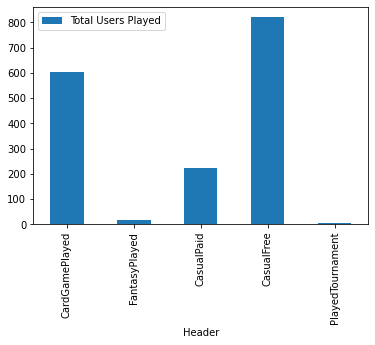

In [12]:
AddMoney = Data1[Data1['JoiningBonus'] == 0]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users didnt get joining bonus.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Users Played':value_played  }).plot.bar(x='Header', y='Total Users Played')
plt.xticks(rotation=90)
plt.show()

Total 2021 number of Users didnt get joining bonus and not added money.
 CardGamePlayed : 513,
 FantasyPlayed : 14,
 CasualPaid : 197,
 CasualFree : 789,
 PlayedTournament 3 


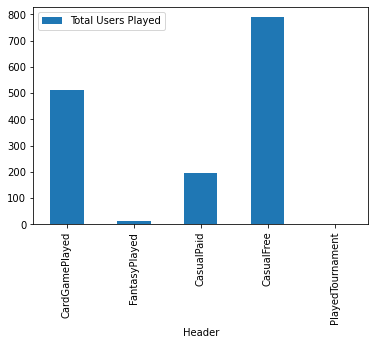

In [13]:
AddMoney = Data1[(Data1['JoiningBonus'] == 0) & (Data1['cashAdded'] == 0)]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users didnt get joining bonus and not added money.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Users Played':value_played  }).plot.bar(x='Header', y='Total Users Played')
plt.xticks(rotation=90)
plt.show()

Total 513 number of Users didnt get joining bonus and not added money.
 FantasyPlayed : 9,
 CasualPaid : 69,
 CasualFree : 449,
 PlayedTournament 3 


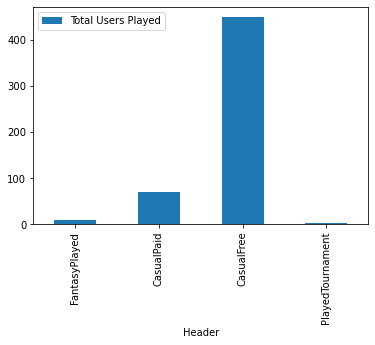

In [14]:
AddMoney = Data1[(Data1['JoiningBonus'] == 0) & (Data1['cashAdded'] == 0) & (Data1['CardGamePlayed'] == 1)]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users didnt get joining bonus and not added money.\n FantasyPlayed : "+str(final[0][0])+",\n CasualPaid : "+str(final[0][1])+",\n CasualFree : "+str(final[0][2])+",\n PlayedTournament "+str(final[0][3])+" ")
pd.DataFrame({'Header':Header, 'Total Users Played':value_played  }).plot.bar(x='Header', y='Total Users Played')
plt.xticks(rotation=90)
plt.show()

Total number 257 users redeemed Money
Total number 3525 users not redeemed money


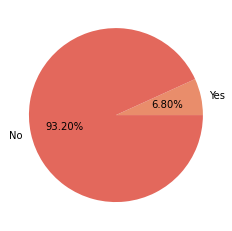

In [15]:
RedeemedMoney = Data1[Data1['Redeemed']==1]
NotRedeemedMoney = Data1[Data1['Redeemed']==0]
print("Total number "+str(len(RedeemedMoney))+" users redeemed Money")
print("Total number "+str(len(NotRedeemedMoney))+" users not redeemed money")
data=[RedeemedMoney.shape[0],NotRedeemedMoney.shape[0]]
labels=['Yes','No']
colors = sns.color_palette('flare')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

Total 3525 number of Users not redeemed Money.
 CardGamePlayed : 1479,
 FantasyPlayed : 61,
 CasualPaid : 976,
 CasualFree : 1498,
 PlayedTournament 72 


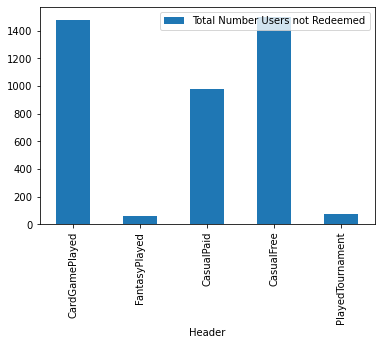

In [16]:
AddMoney = Data1[Data1['Redeemed'] == 0]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users not redeemed Money.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Number Users not Redeemed':value_played  }).plot.bar(x='Header', y='Total Number Users not Redeemed')
plt.xticks(rotation=90)
plt.show()

Total 257 number of Users redeemed Money.
 CardGamePlayed : 220,
 FantasyPlayed : 7,
 CasualPaid : 76,
 CasualFree : 119,
 PlayedTournament 4 


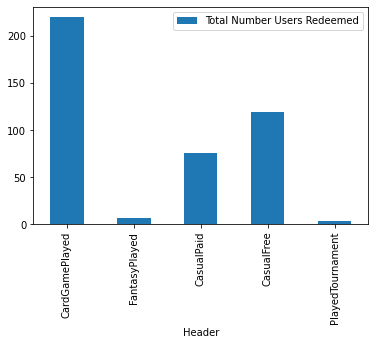

In [17]:
AddMoney = Data1[Data1['Redeemed'] == 1]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users redeemed Money.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Number Users Redeemed':value_played  }).plot.bar(x='Header', y='Total Number Users Redeemed')
plt.xticks(rotation=90)
plt.show()

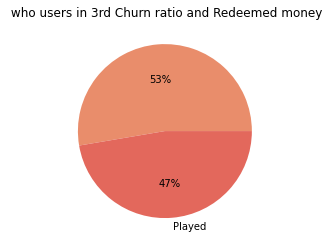

 Calculus : 257 number of users Redeemed money, 
	and same 231 number of users played


In [18]:
RedeemedMoney = Data1[Data1['Redeemed'] == 1]
RedeemedMoneyPlayed = RedeemedMoney[RedeemedMoney['TotalGamePlayed_2'] >=1]
data=[RedeemedMoney.shape[0],RedeemedMoneyPlayed.shape[0]]
labels=['','Played']
plt.title(" who users in 3rd Churn ratio and Redeemed money")
colors = sns.color_palette('flare')[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
print(" Calculus : "+str(RedeemedMoney.shape[0])+" number of users Redeemed money, \n\tand same "+str(RedeemedMoneyPlayed.shape[0])+" number of users played")

		Total 26 Not played


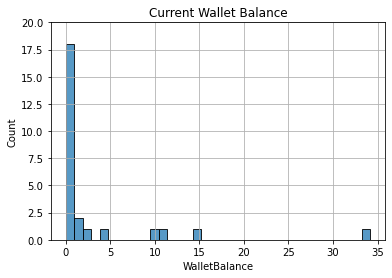

In [19]:
RedeemedMoney = Data1[Data1['Redeemed'] == 1]
RedeemedMoneyNotPlayed = RedeemedMoney[RedeemedMoney['TotalGamePlayed_2'] == 0]
print("\t\tTotal "+str(len(RedeemedMoneyNotPlayed))+" Not played")
gfg=sns.histplot(RedeemedMoneyNotPlayed['WalletBalance'])
gfg.set_ylim(0, 20)
plt.title("Current Wallet Balance")
plt.grid()
plt.show()

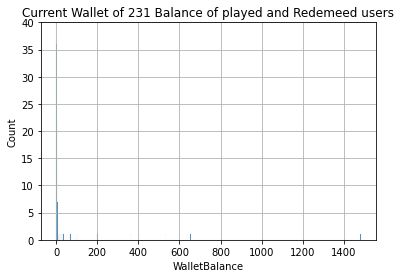

In [20]:
RedeemedMoney = Data1[Data1['Redeemed'] == 1]
RedeemedMoneyPlayed = RedeemedMoney[RedeemedMoney['TotalGamePlayed_2'] >= 1]
gfg=sns.histplot(RedeemedMoneyPlayed['WalletBalance'])
plt.title("Current Wallet of "+str(len(RedeemedMoneyPlayed))+" Balance of played and Redemeed users")
gfg.set_ylim(0, 40)
gfg.grid()
plt.show()

Total number 172 users CashBackGiven Money
Total number 3610 users not CashBackGiven money


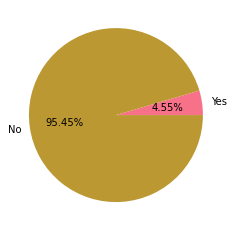

In [21]:
RedeemedMoney = Data1[Data1['CashBackGiven']==1]
NotRedeemedMoney = Data1[Data1['CashBackGiven']==0]
print("Total number "+str(len(RedeemedMoney))+" users CashBackGiven Money")
print("Total number "+str(len(NotRedeemedMoney))+" users not CashBackGiven money")
data=[RedeemedMoney.shape[0],NotRedeemedMoney.shape[0]]
labels=['Yes','No']
colors = sns.color_palette('husl')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

Total number 172 users cashAdded Money
Total number 3610 users not cashAdded money


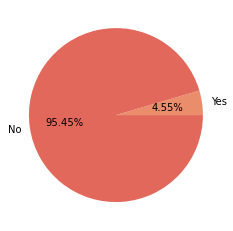

In [22]:
RedeemedMoney = Data1[Data1['cashAdded']==1]
NotRedeemedMoney = Data1[Data1['cashAdded']==0]
print("Total number "+str(len(RedeemedMoney))+" users cashAdded Money")
print("Total number "+str(len(NotRedeemedMoney))+" users not cashAdded money")
data=[RedeemedMoney.shape[0],NotRedeemedMoney.shape[0]]
labels=['Yes','No']
colors = sns.color_palette('flare')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

Total 3610 number of Users didnt get CashBack.
 CardGamePlayed : 1547,
 FantasyPlayed : 63,
 CasualPaid : 997,
 CasualFree : 1560,
 PlayedTournament 66 


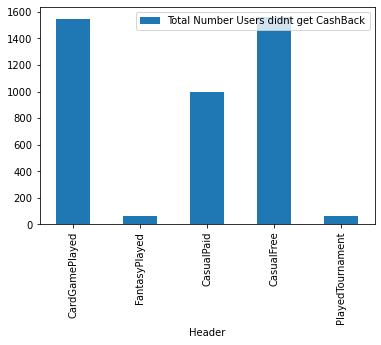

In [23]:
AddMoney = Data1[Data1['CashBackGiven'] == 0]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users didnt get CashBack.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Number Users didnt get CashBack':value_played  }).plot.bar(x='Header', y='Total Number Users didnt get CashBack')
plt.xticks(rotation=90)
plt.show()

Total 172 number of Users got cashBack.
 CardGamePlayed : 152,
 FantasyPlayed : 5,
 CasualPaid : 55,
 CasualFree : 57,
 PlayedTournament 10 


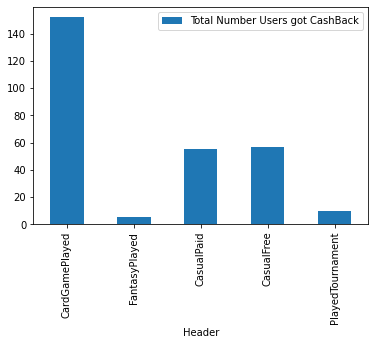

In [24]:
AddMoney = Data1[Data1['CashBackGiven'] == 1]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users got cashBack.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Number Users got CashBack':value_played  }).plot.bar(x='Header', y='Total Number Users got CashBack')
plt.xticks(rotation=90)
plt.show()

	User Not Added Money 3610 
Total 2185 number of Users not Played.
 CardGamePlayed : 1401,
 FantasyPlayed : 63,
 CasualPaid : 936,
 CasualFree : 1560,
 PlayedTournament 56 


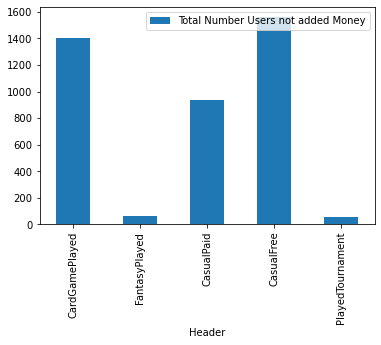

In [25]:
AddMoney = Data1[Data1['cashAdded'] == 0]
print("\tUser Not Added Money "+str(len(AddMoney))+" ")
AddMoney = Data1[(Data1['cashAdded'] == 0) & (Data1['TotalGamePlayed_2'] >0)]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users not Played.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Number Users not added Money':value_played  }).plot.bar(x='Header', y='Total Number Users not added Money')
plt.xticks(rotation=90)
plt.show()

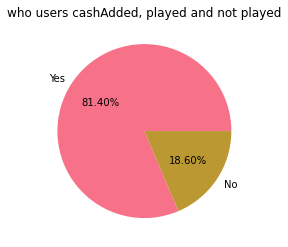

Calculus: 140 number of users Cash added, played,
	32 number of users added money but not played


In [26]:
JoiningBonus = Data1[(Data1['TotalGamePlayed_2'] >= 1) & (Data1['cashAdded'] == 1)]
NotJoiningBonus = Data1[(Data1['TotalGamePlayed_2'] == 0) & (Data1['cashAdded'] == 1)]
data=[JoiningBonus.shape[0],NotJoiningBonus.shape[0]]
labels=['Yes','No']
plt.title("who users cashAdded, played and not played")
colors = sns.color_palette("husl")[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()
print("Calculus: "+str(JoiningBonus.shape[0])+" number of users Cash added, played,\n\t"+str(NotJoiningBonus.shape[0])+" number of users added money but not played")

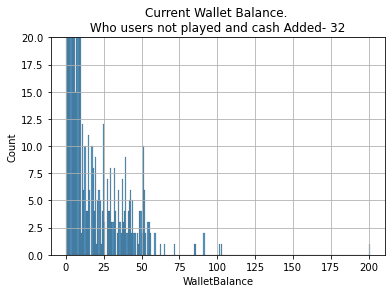

In [27]:
NotJoiningBonus = Data1[(Data1['TotalGamePlayed_2'] == 0) & (Data1['cashAdded'] == 1)]
gfg=sns.histplot(AddMoney['WalletBalance'])
gfg.set_ylim(0, 20)
plt.title("Current Wallet Balance. \n Who users not played and cash Added- "+str(len(NotJoiningBonus))+" ")
plt.grid()
plt.show()

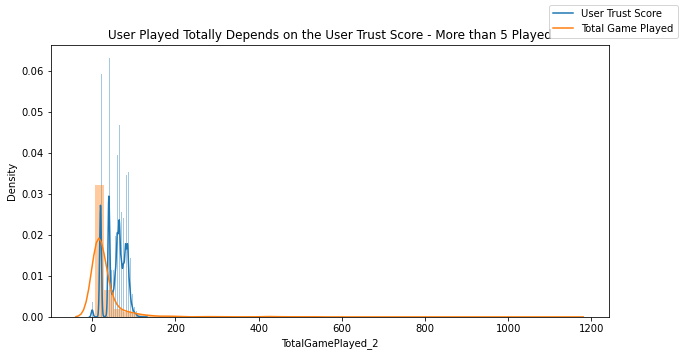

In [28]:
fig = plt.figure(figsize=(10,5))
x = Data['UserTrustScore']
y = Data1[Data1['TotalGamePlayed_2'] > 5]['TotalGamePlayed_2']
sns.distplot(x)
sns.distplot(y)
fig.legend(labels=['User Trust Score','Total Game Played'])
plt.title("User Played Totally Depends on the User Trust Score - More than 5 Played")
plt.show()

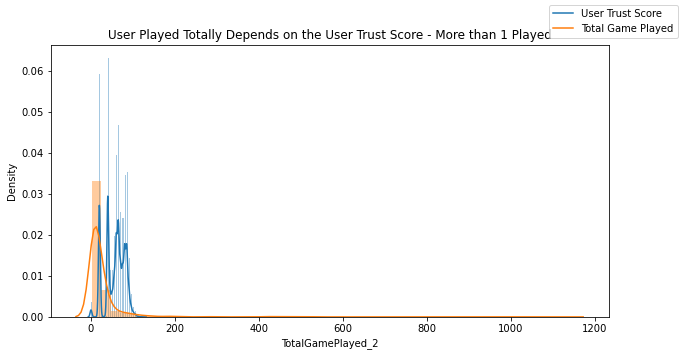

In [29]:
fig = plt.figure(figsize=(10,5))
x = Data['UserTrustScore']
y = Data1[Data1['TotalGamePlayed_2'] > 1]['TotalGamePlayed_2']
sns.distplot(x)
sns.distplot(y)
fig.legend(labels=['User Trust Score','Total Game Played'])
plt.title("User Played Totally Depends on the User Trust Score - More than 1 Played")
plt.show()

Total 1661 number of Users got joining bonus.
 CardGamePlayed : 1097,
 FantasyPlayed : 52,
 CasualPaid : 831,
 CasualFree : 797,
 PlayedTournament 71 


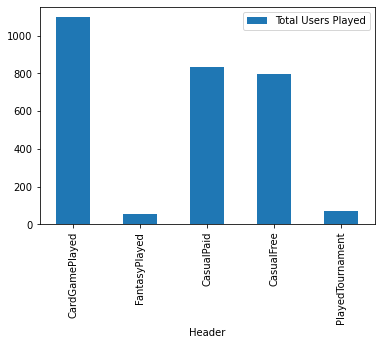

In [30]:
AddMoney = Data1[Data1['JoiningBonus'] == 1]
ChurnPlayedGameWise = pd.DataFrame(AddMoney[['CardGamePlayed','FantasyPlayed','CasualPaid','CasualFree','PlayedTournament']].sum())
final = ChurnPlayedGameWise.reset_index()
Header = final['index'].to_list()
value_played = final[0].to_list()
print("Total "+str(len(AddMoney))+" number of Users got joining bonus.\n CardGamePlayed : "+str(final[0][0])+",\n FantasyPlayed : "+str(final[0][1])+",\n CasualPaid : "+str(final[0][2])+",\n CasualFree : "+str(final[0][3])+",\n PlayedTournament "+str(final[0][4])+" ")
pd.DataFrame({'Header':Header, 'Total Users Played':value_played  }).plot.bar(x='Header', y='Total Users Played')
plt.xticks(rotation=90)
plt.show()